## Ordinary Least Squares and Ridge Regression

[example 1 ](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-py)

### Importing dataset

In [42]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)


### Training


In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

### Predicting and Comparing

In [44]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = reg.predict(X_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


### Plotting


|  ax[0]    |   ax[1]   |
|-----------|-----------|


whole is fig

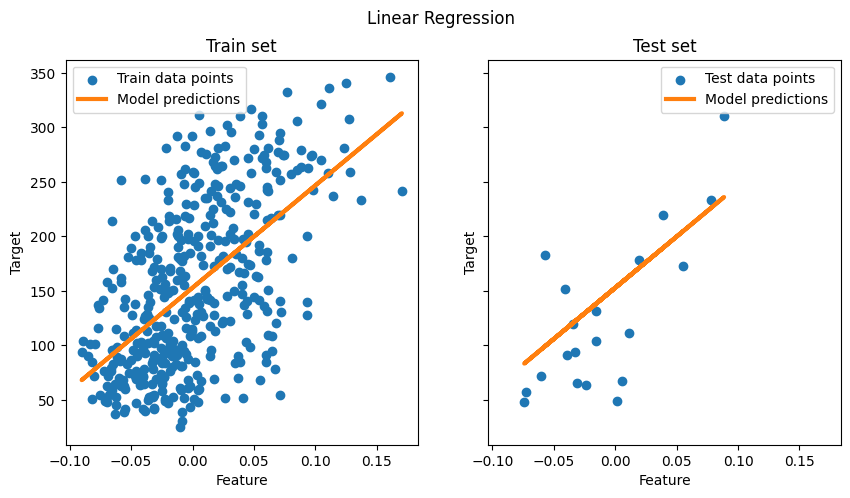

In [45]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(ncols=2,figsize=(10,5), sharex=True, sharey=True)
#fig whole thing, ax subgraphs 
ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    reg.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",    
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

## Plot Ridge coefficients as a function of the regularization

[example 2](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)

### Imports

In [46]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

### Compute paths

In [47]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

### Display

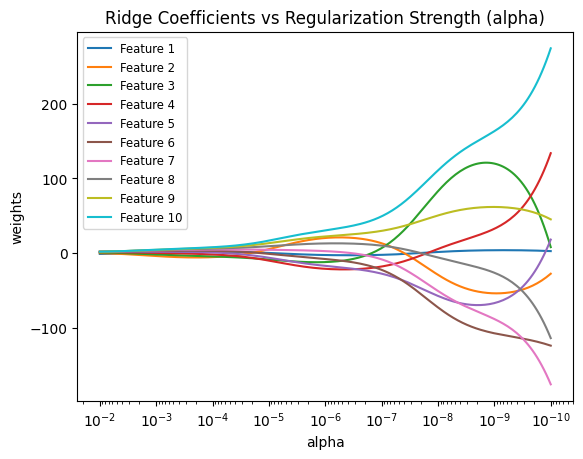

In [48]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge Coefficients vs Regularization Strength (alpha)")
plt.axis("tight")
plt.legend(
    [f"Feature {i + 1}" for i in range(X.shape[1])], loc="best", fontsize="small"
)
plt.show()

## Common pitfalls in the interpretation of coefficients of linear models

[example 3](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py)

### Imports

In [49]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import scipy as sp 
import seaborn as sns 

### The dataset: wages

In [50]:
from sklearn.datasets import fetch_openml
survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
X.describe(include="all")

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


In [51]:
X.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,35,White,Other,Other,Married


In [52]:
y = survey.target.values.ravel()
survey.target.head()
# if you prefer numpy then .values, sklearn prefers it 

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

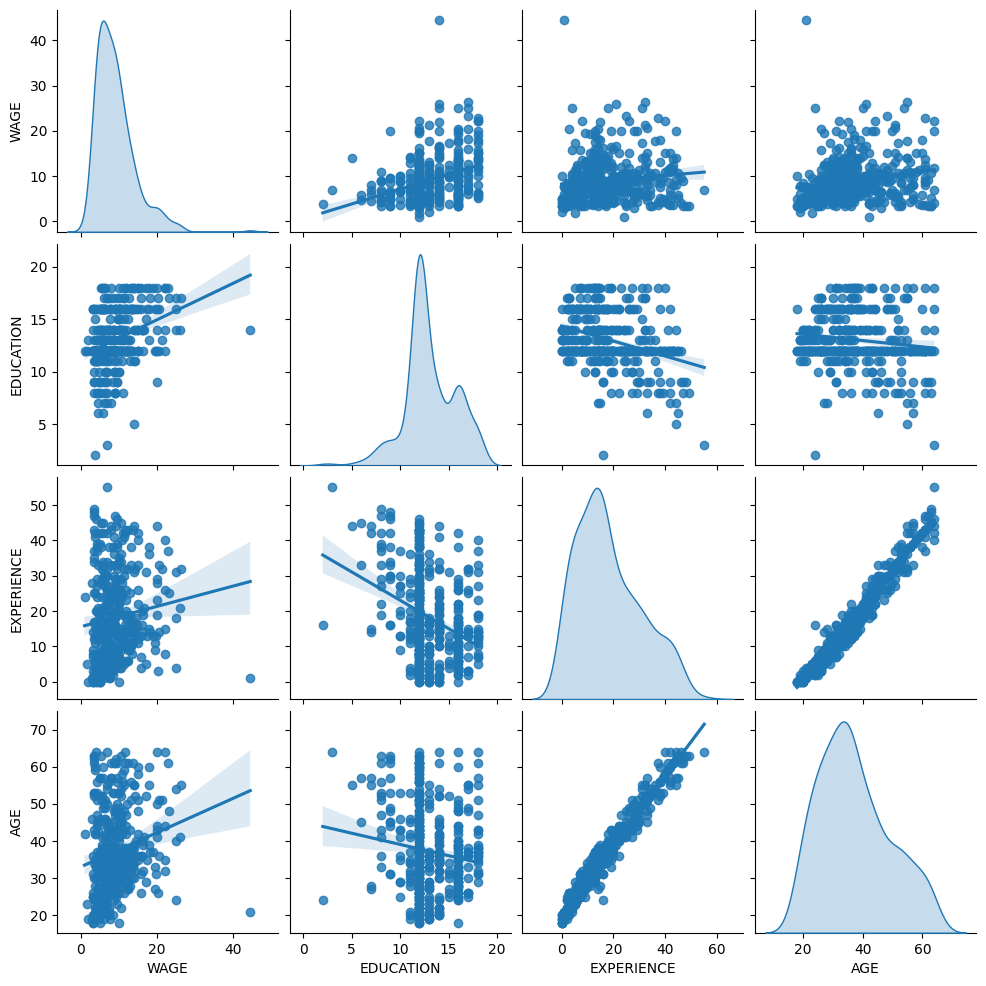

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
# DataFrame.insert(loc, column_name, values)
sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

### The machine-learning pipeline

In [54]:
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    int64   
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    int64   
 4   UNION       534 non-null    category
 5   AGE         534 non-null    int64   
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), int64(3)
memory usage: 17.2 KB


##### One-Hot Encoding

Particular categorical variables cannot be included in linear model if not coded as integers first. So use 1 hot encoding

Instead of trying to stuff multiple category labels into a single column, one-hot encoding spreads the categories across multiple columns, where each column represents one category, and the values are 0 or 1 depending on whether the sample belongs to that category.

R    B    G <br>
    1            0              0 <br>
    0            1              0 <br>
    0            0              1 <br>
    1            0              0


In [55]:
from sklearn.compose import make_column_transformer
#make_column_transformer builds a preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["SOUTH", "SEX", "UNION", "RACE", "OCCUPATION", "SECTOR", "MARR"]
numerical_columns = ['Education',"AGE", "EXPERIENCE"]  # <- Removed duplicate "AGE"

preprocessor = make_column_transformer((OneHotEncoder(drop="if_binary"), categorical_columns),
                                       remainder='passthrough', verbose_feature_names_out=False)
# remainder one All columns not listed in categorical_columns (your numerical columns) are passed through without modification.

In [56]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    preprocessor, TransformedTargetRegressor(regressor=Ridge(alpha=1e-10), func = np.log10, inverse_func=sp.special.exp10)
)

| Situation                                                                                       | Should you log‑transform?  | Why / Why not                                                                                                                   |
| ----------------------------------------------------------------------------------------------- | -------------------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| **Outcome is strictly positive, hugely right‑skewed, and you care about *percentage* effects.** | **Yes, log it.**           | Stabilises variance, turns multiplicative jumps (“₹50 k → ₹100 k”) into additive ones on the log scale, yields Δβ ≈ % change.   |
| **Outcome has zeros or negatives (e.g. profit, temperature).**                                  | **No—plain log explodes.** | Either use `log1p(x)` (log(1 + x)) or a different transform (Yeo‑Johnson, Box‑Cox) that can handle ≤ 0, or skip transformation. |
| **Distribution is roughly symmetric already.**                                                  | **Probably not.**          | You’d just be adding cognitive overhead for little statistical gain.                                                            |
| **Interpretability must stay in the original units (e.g. predicting blood pressure in mmHg).**  | **Often no.**              | Stakeholders may not love exp() math at every meeting.                                                                          |
| **Model is non‑linear or tree‑based** (RF, GBM, XGBoost)                                        | **Usually unnecessary.**   | Trees don’t assume linearity or homoskedastic errors; they’ll carve the space just fine.                                        |
| **You’re building a geomean or growth‑rate model** (finance, ecology)                           | **Yes, log is natural.**   | Compounded growth = additive in log space.                                                                                      |


### Processing the dataset

In [57]:
model.fit(X_train, y_train)

/Users/apple/Downloads/Blinking-ML/MrBlink/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['SOUTH', 'SEX', 'UNION',
                                                   'RACE', 'OCCUPATION',
                                                   'SECTOR', 'MARR'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

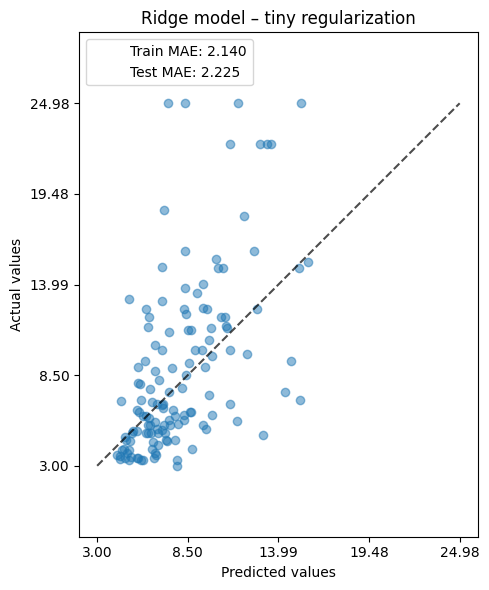

In [58]:
from sklearn.metrics import median_absolute_error, PredictionErrorDisplay
from matplotlib import pyplot as plt
from sklearn.metrics import median_absolute_error, PredictionErrorDisplay

# Calculate MAE
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)

# Plot
fig, ax = plt.subplots(figsize=(5, 6))
PredictionErrorDisplay.from_predictions(
    y_test, y_pred,
    kind="actual_vs_predicted",
    ax=ax,
    scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model – tiny regularization")

# Custom scores
scores = {
    "Train MAE": mae_train,
    "Test MAE": mae_test
}

# Add legend with fake handles
custom_handles = [
    plt.Line2D([], [], linestyle='', marker='', label=f"{name}: {score:.3f}")
    for name, score in scores.items()
]
ax.legend(handles=custom_handles, loc="upper left")

plt.tight_layout()
plt.show()


### Interpreting coefficients: scale matters

In [ ]:
data = model[:-1].get_feature_names_out()
# This returns a new pipeline with all steps except the last one — i.e., just the preprocessor. preprocesssor gives feature names
# Hey, what are the final names of all features after preprocessing but before modeling?
coefs = pd.DataFrame(data[-1].regressor_.coef_,
                     columns=["coefficients"],
                     index='feature_names')
coefs


**models detect correlation, not causation**.

---

### Compressed explanation

* Linear models show **associations** between features and the target.

* They **do not** tell you whether changing a feature will *cause* the target to change.

* Many features are **proxies** for hidden real factors.
  Example: EDUCATION is a proxy for underlying ability, motivation, social background, etc.

* If EDUCATION correlates with WAGE, the model can't tell whether:

  * More education → higher wage
  * More competent people both study more and earn more
  * Or a mixture

* When causality is mixed up (confounding), any “effect per year of education” the model reports is **likely overstated**.

---

### Why it matters for your goals

You don’t need causal inference right now, but you **must** know this because:

* When you build ML systems (like OSSO), you must avoid thinking a coefficient means “do X → Y increases”.
* It protects you from making wrong claims in interviews and projects.
* It’s one of the quickest ways to fail ML reasoning questions: assuming correlation = causation.


---

### What you should retain (short)

**Linear model coefficients reflect correlation in the data; they are not causal effects. Confounding variables can make coefficients misleading.**



##  L1 Penalty and Sparsity in Logistic Regression 

[example 4](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py)

/Users/apple/Downloads/Blinking-ML/MrBlink/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/apple/Downloads/Blinking-ML/MrBlink/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/apple/Downloads/Blinking-ML/MrBlink/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/apple/Downloads/Blinking-ML/MrBlink/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/apple/Downloads/Blinking-ML/MrBlink/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarni

C=1.00
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.89
Score with Elastic-Net penalty:          0.89
Score with L2 penalty:                   0.89


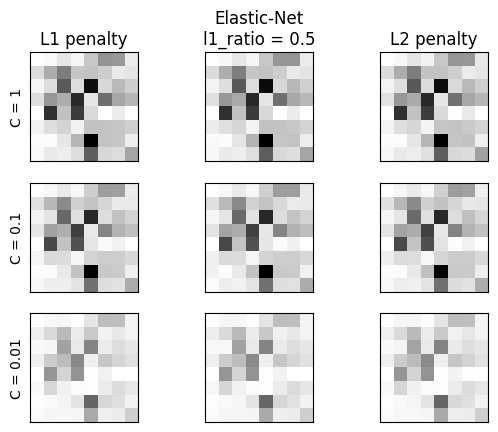

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, l1_ratio=1, tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, l1_ratio=0, tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(C=C, l1_ratio=l1_ratio, tol=0.01, solver="saga")
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.show()

## Plot classification probability

### Imports 

In [20]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm

from sklearn import datasets
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    KBinsDiscretizer,
    PolynomialFeatures,
    SplineTransformer,
)

### Data: 2D projection of the iris dataset



In [21]:
iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

### Probabilistic classifiers

In [24]:
classifiers = {
    "Logistic regression\n(C=0.01)": LogisticRegression(C=0.1),
    "Logistic regression\n(C=1)": LogisticRegression(C=100),
    "Gaussian Process": GaussianProcessClassifier(kernel=1.0 * RBF([1.0, 1.0])),
    "Logistic regression\n(RBF features)": make_pipeline(
        Nystroem(kernel="rbf", gamma=5e-1, n_components=50, random_state=1),
        LogisticRegression(C=10),
    ),
    "Gradient Boosting": HistGradientBoostingClassifier(),
    "Logistic regression\n(binned features)": make_pipeline(
        KBinsDiscretizer(n_bins=5),
        PolynomialFeatures(interaction_only=True),
        LogisticRegression(C=10),
    ),
    "Logistic regression\n(spline features)": make_pipeline(
        SplineTransformer(n_knots=5),
        PolynomialFeatures(interaction_only=True),
        LogisticRegression(C=10),
    ),
}

### Plotting the decision boundaries

/var/folders/zz/hz5n3gw12db770fjhgx44zj00000gn/T/ipykernel_1294/1827661060.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 1])


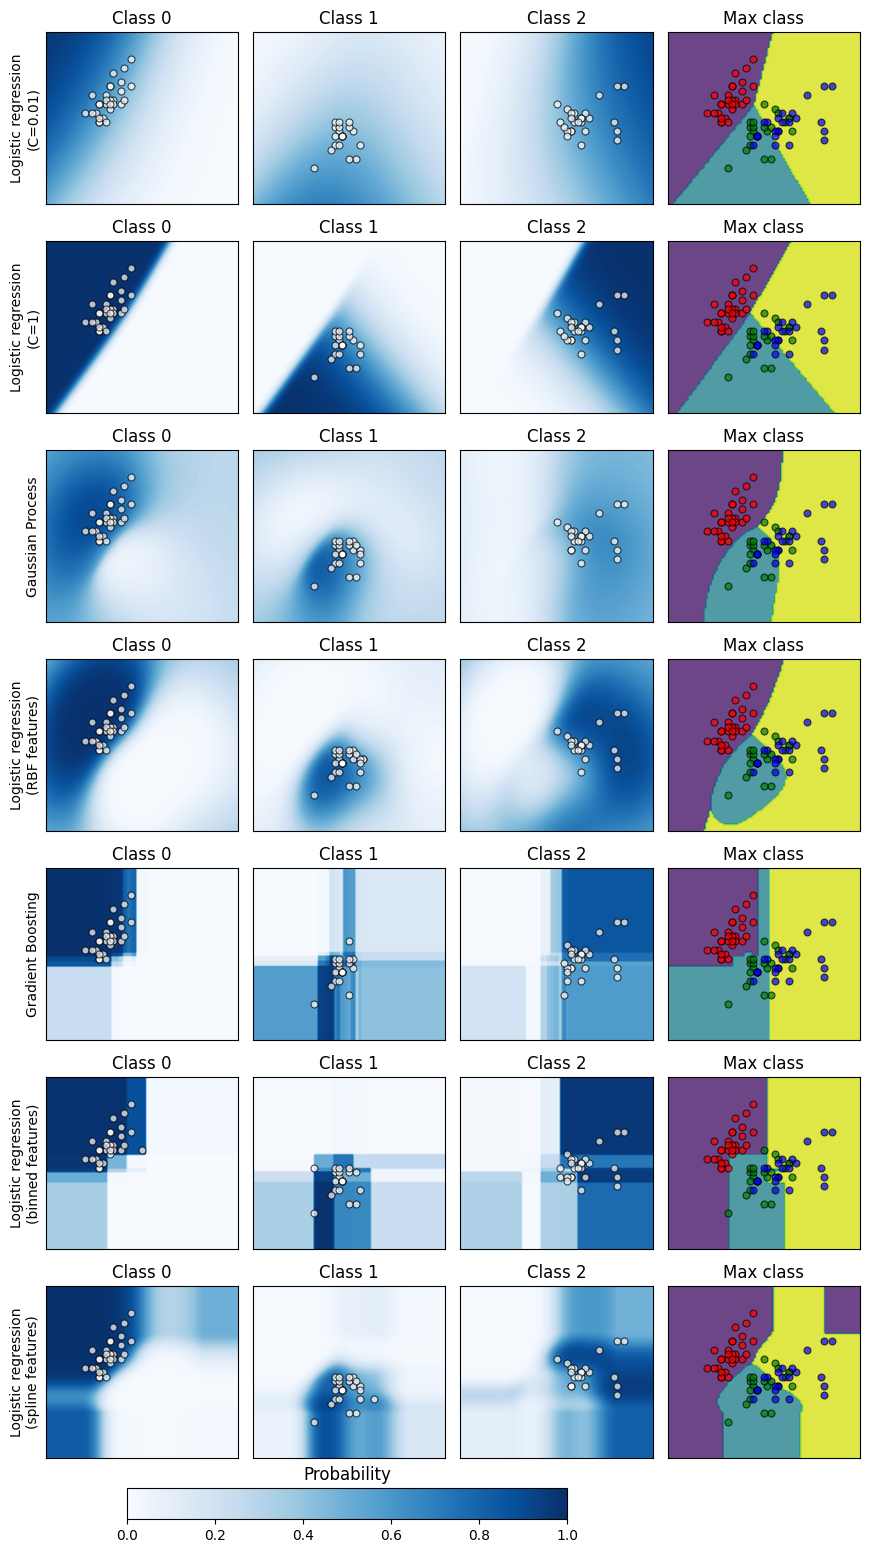


Evaluation Results:
                                 name  accuracy  roc_auc  log_loss
         Logistic regression (C=0.01)  0.826667 0.921405  0.710388
            Logistic regression (C=1)  0.813333 0.928094  0.355026
                     Gaussian Process  0.800000 0.927815  0.536282
   Logistic regression (RBF features)  0.773333 0.926143  0.400250
                    Gradient Boosting  0.826667 0.920011  0.399847
Logistic regression (binned features)  0.813333 0.916724  0.477288
Logistic regression (spline features)  0.786667 0.916667  0.421949


In [30]:
n_classifiers = len(classifiers)
scatter_kwargs = {
    "s": 25,
    "marker": "o",
    "linewidths": 0.8,
    "edgecolor": "k",
    "alpha": 0.7,
}
y_unique = np.unique(y)
# Ensure legend not cut off
mpl.rcParams["savefig.bbox"] = "tight"
fig, axes = plt.subplots(
    nrows=n_classifiers,
    ncols=len(iris.target_names) + 1,
    figsize=(4 * 2.2, n_classifiers * 2.2),
)
evaluation_results = []
levels = 100

# Define colors for each class
colors = ['red', 'green', 'blue']

for classifier_idx, (name, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
    log_loss_test = log_loss(y_test, y_pred_proba)
    evaluation_results.append(
        {
            "name": name.replace("\n", " "),
            "accuracy": accuracy_test,
            "roc_auc": roc_auc_test,
            "log_loss": log_loss_test,
        }
    )
    
    for label in y_unique:
        # plot the probability estimate provided by the classifier
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier,
            X_train,
            response_method="predict_proba",
            class_of_interest=label,
            ax=axes[classifier_idx, label],
            vmin=0,
            vmax=1,
            cmap="Blues",
            levels=levels,
        )
        axes[classifier_idx, label].set_title(f"Class {label}")
        # plot data predicted to belong to given class
        mask_y_pred = y_pred == label
        axes[classifier_idx, label].scatter(
            X_test[mask_y_pred, 0], X_test[mask_y_pred, 1], c="w", **scatter_kwargs
        )
        axes[classifier_idx, label].set(xticks=(), yticks=())
    
    # add column that shows all classes by plotting class with max 'predict_proba'
    max_class_disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        X_train,
        response_method="predict",
        ax=axes[classifier_idx, len(y_unique)],
        cmap="viridis",
        alpha=0.8,
    )
    
    for label in y_unique:
        mask_label = y_test == label
        axes[classifier_idx, 3].scatter(
            X_test[mask_label, 0],
            X_test[mask_label, 1],
            c=colors[label],  # Use simple color list instead
            **scatter_kwargs,
        )
    
    axes[classifier_idx, 3].set(xticks=(), yticks=())
    axes[classifier_idx, 3].set_title("Max class")
    axes[classifier_idx, 0].set_ylabel(name)

# colorbar for single class plots (OUTSIDE the loop)
ax_single = fig.add_axes([0.15, 0.01, 0.5, 0.02])
plt.title("Probability")
_ = plt.colorbar(
    cm.ScalarMappable(norm=None, cmap="Blues"),
    cax=ax_single,
    orientation="horizontal",
)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()

# Display evaluation results
print("\nEvaluation Results:")
print(pd.DataFrame(evaluation_results).to_string(index=False))